In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/PAc"
%pip install import_ipynb
import import_ipynb

from PAc_optimal_bounds import *

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/PAc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00
importing Jupyter notebook from PAc_optimal_bounds.ipynb
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.0 MB/s eta 0:00:00


In [2]:
print_versions_and_GPU()

match get_env_type():
    case 'kaggle':
        raise ValueError('This notebook is not designed to run on Kaggle.')
    case 'google.colab':
        data_path = '/content/drive/MyDrive/data/PAc/bounds/'
    case 'local':
        data_path = './data/'
    case _:
        raise ValueError(f'Unknown environment type: {get_env_type()}')

print(f'Running on {get_env_type()}')

Python: 3.10.12
TensorFlow: 2.15.0
Keras: Unknown version
Scikit-learn: 1.2.2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Running on CPU
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Running on google.colab


In [3]:
import tensorflow as tf

approx_gelu = PAc_Approximator(
    func=lambda x: tf.nn.gelu(x).numpy(),
    func_low=lambda x: 0,
    func_high=lambda x: x)


In [4]:
for sz in [16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    multi_opt_runner(data_path, f'gelu_{sz}', approx_gelu.approx_swarm_errors, n=sz, num_runs=5, max_iter=1000, sig_digits=4, patience=30)

2024-06-02 07:27:37.839829 gelu_16 loaded (5)
2024-06-02 07:27:38.065616 gelu_32 loaded (5)
2024-06-02 07:27:38.266525 gelu_64 loaded (5)
2024-06-02 07:27:38.625054 gelu_128 loaded (5)
2024-06-02 07:27:38.859723 gelu_256 loaded (5)
2024-06-02 07:27:39.101002 gelu_512 loaded (5)
2024-06-02 07:27:39.354299 gelu_1024 loaded (5)
2024-06-02 07:27:39.575543 gelu_2048 loaded (5)
2024-06-02 07:27:39.794165 gelu_4096 loaded (5)


In [5]:
engine = PSOEngine2D()
engine.optimize(approx_gelu.approx_swarm_errors, max_iter=1000, sig_digits=5, patience=50, n=256)

2024-06-02 07:27:39.821713 Starting optimization 1000 3.38222e-03 3.35017e-03 2.76493e-03 1.43583e-03 1.02846e-03 ...6.38905e-04 ...5.11352e-04 ...5.08918e-04 ............4.43258e-04 ................................................. - Early stopping: 0.00044325840848057194 @ [-2.73459489  2.6200146 ]


0.00044325840848057194

<Axes: title={'center': 'Cost History'}, xlabel='Iterations', ylabel='Cost'>

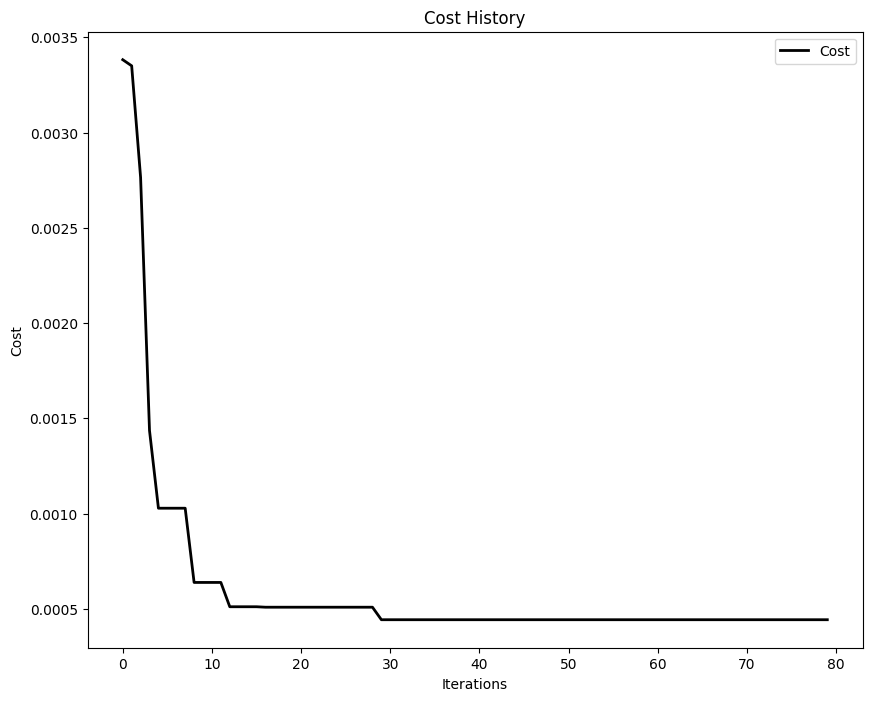

In [6]:
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt

plot_cost_history(cost_history=engine.optimizer.cost_history)

In [7]:
best_x_min, best_x_max = engine.best_pos[0], engine.best_pos[1]


In [8]:
plot_gelu_256_10_10 = Error3D(data_path, "gelu_256_10_10", "PAc-GELU (256)", best_x_min, best_x_max, approx_gelu, 256, -10., 0., 0., 10., 50)

2024-06-02 07:30:03.714157 Data Loaded


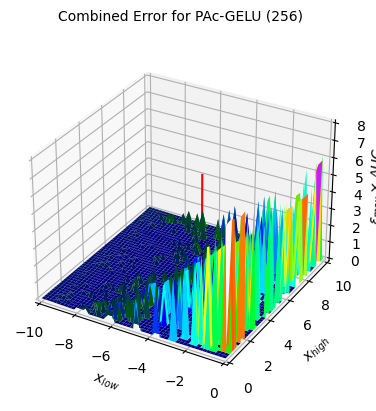

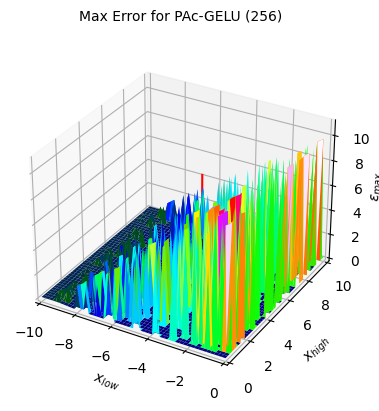

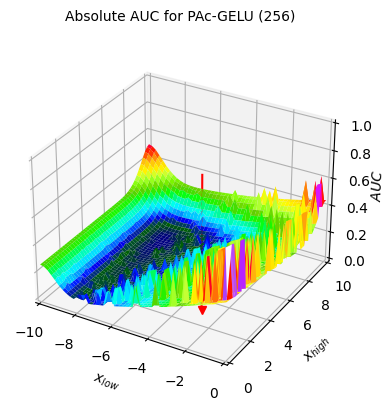

In [9]:
plot_gelu_256_10_10.plot_combined_error()
plot_gelu_256_10_10.plot_max_error()
plot_gelu_256_10_10.plot_auc()

In [10]:
plot_gelu_256_2_2 = Error3D(data_path, "gelu_256_2_2", "PAc-GELU (256)", best_x_min, best_x_max, approx_gelu, 256, -3.5, -1.5, 1.5, 3.5, 50)

2024-06-02 07:30:04.917587 Building mesh row 1/50 (2.00%)
2024-06-02 07:30:13.813454 Building mesh row 2/50 (4.00%)
2024-06-02 07:30:22.828773 Building mesh row 3/50 (6.00%)
2024-06-02 07:30:31.845498 Building mesh row 4/50 (8.00%)
2024-06-02 07:30:40.692721 Building mesh row 5/50 (10.00%)
2024-06-02 07:30:49.521121 Building mesh row 6/50 (12.00%)
2024-06-02 07:30:58.358725 Building mesh row 7/50 (14.00%)
2024-06-02 07:31:07.171610 Building mesh row 8/50 (16.00%)
2024-06-02 07:31:15.838836 Building mesh row 9/50 (18.00%)
2024-06-02 07:31:24.559597 Building mesh row 10/50 (20.00%)
2024-06-02 07:31:33.256217 Building mesh row 11/50 (22.00%)
2024-06-02 07:31:42.026951 Building mesh row 12/50 (24.00%)
2024-06-02 07:31:50.757522 Building mesh row 13/50 (26.00%)
2024-06-02 07:31:59.453862 Building mesh row 14/50 (28.00%)
2024-06-02 07:32:08.148515 Building mesh row 15/50 (30.00%)
2024-06-02 07:32:16.880691 Building mesh row 16/50 (32.00%)
2024-06-02 07:32:25.623805 Building mesh row 17/50 (3

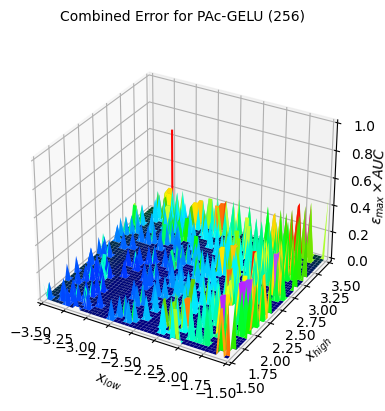

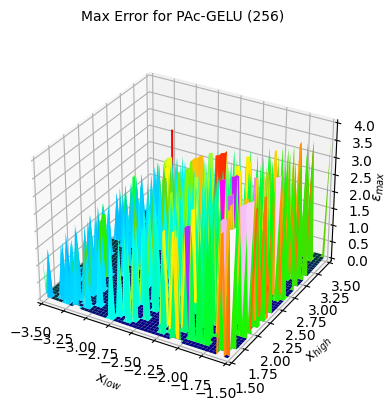

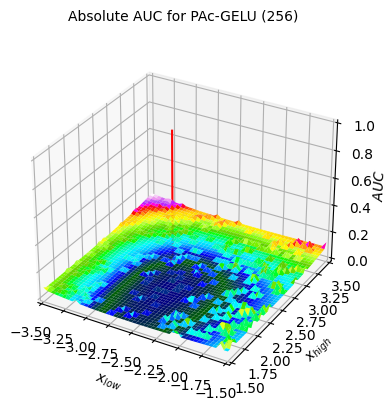

In [11]:
plot_gelu_256_2_2.plot_combined_error()
plot_gelu_256_2_2.plot_max_error()
plot_gelu_256_2_2.plot_auc()

In [12]:
plot_gelu_256_05_05 = Error3D(data_path, "gelu_256_05_05", "PAc-GELU (256)", best_x_min, best_x_max, approx_gelu, 256, -2.90, -2.40, 2.40, 2.90, 50)

2024-06-02 07:37:22.212731 Building mesh row 1/50 (2.00%)
2024-06-02 07:37:31.229259 Building mesh row 2/50 (4.00%)
2024-06-02 07:37:40.257919 Building mesh row 3/50 (6.00%)
2024-06-02 07:37:49.226545 Building mesh row 4/50 (8.00%)
2024-06-02 07:37:58.213371 Building mesh row 5/50 (10.00%)
2024-06-02 07:38:07.206384 Building mesh row 6/50 (12.00%)
2024-06-02 07:38:16.267989 Building mesh row 7/50 (14.00%)
2024-06-02 07:38:25.233020 Building mesh row 8/50 (16.00%)
2024-06-02 07:38:34.167024 Building mesh row 9/50 (18.00%)
2024-06-02 07:38:43.161357 Building mesh row 10/50 (20.00%)
2024-06-02 07:38:52.214174 Building mesh row 11/50 (22.00%)
2024-06-02 07:39:01.234094 Building mesh row 12/50 (24.00%)
2024-06-02 07:39:10.235113 Building mesh row 13/50 (26.00%)
2024-06-02 07:39:19.234449 Building mesh row 14/50 (28.00%)
2024-06-02 07:39:28.196056 Building mesh row 15/50 (30.00%)
2024-06-02 07:39:37.138544 Building mesh row 16/50 (32.00%)
2024-06-02 07:39:46.112279 Building mesh row 17/50 (3

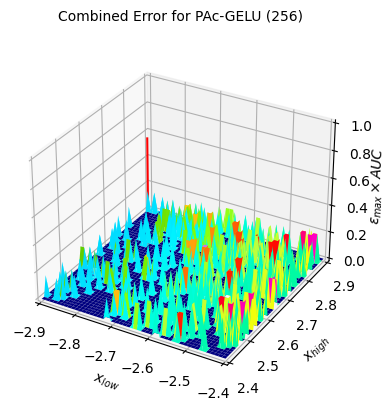

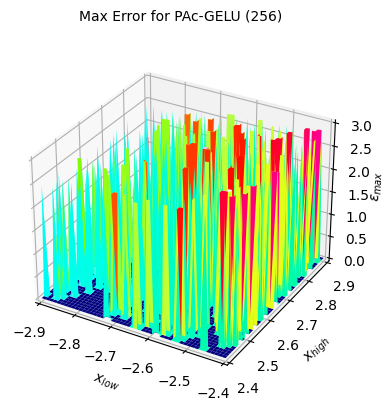

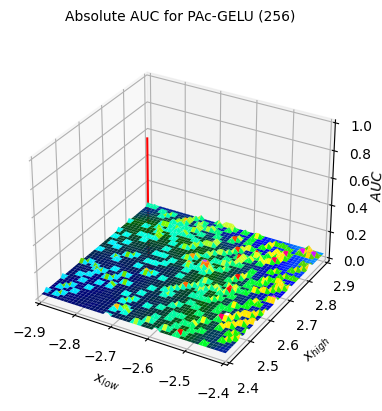

In [13]:
plot_gelu_256_05_05.plot_combined_error()
plot_gelu_256_05_05.plot_max_error()
plot_gelu_256_05_05.plot_auc()